### Белянинов Илья ПМ22-1

### Семинар

1)Сгенерируйте данные и обучите на них модель перцептрона.

2)Просмотрите параметры модели, визуализируйте и улучшите ее работу.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.svm import LinearSVC

In [4]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

n_features: Число признаков (размерность) для каждой точки данных.

n_samples: Общее количество точек данных, которые будут сгенерированы.

centers: Количество центров (кластеров), которые следует сгенерировать.

random_state: Зерно для инициализации генератора случайных чисел, обеспечивающее воспроизводимость результатов.

cluster_std: Стандартное отклонение кластеров. Этот параметр регулирует разброс точек внутри каждого кластера.

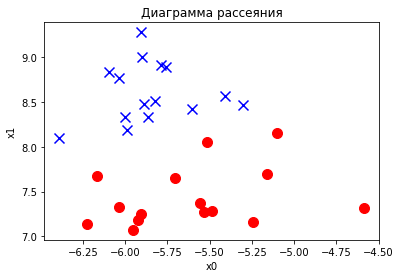

In [5]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [6]:
svm_linear = SVC(kernel='linear', C=100).fit(X, y)

In [7]:
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

In [8]:
svm_linear.intercept_

array([-64.2533988])

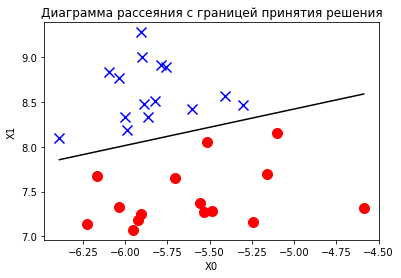

In [9]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [10]:
svm_linear.support_vectors_

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [11]:
svm_linear.support_

array([ 0,  8, 29])

In [12]:
svm_linear.n_support_

array([1, 2])

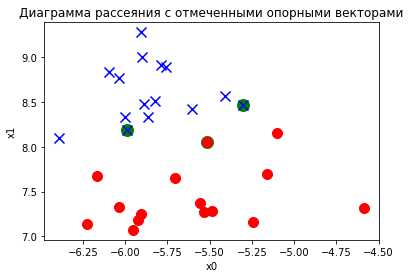

In [13]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

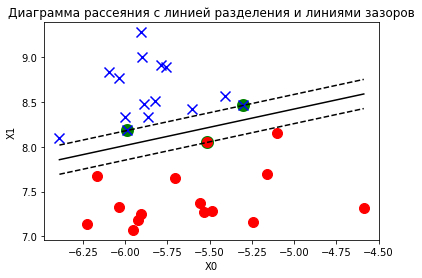

In [14]:
plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

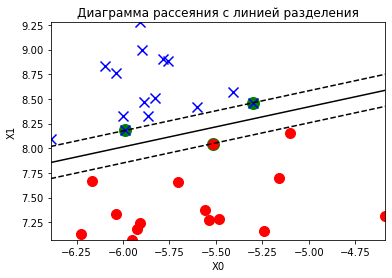

In [15]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [16]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

In [17]:
y_pred =  svm_linear.predict(X)

In [18]:
metrics.accuracy_score(y, y_pred)

1.0

In [19]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]], dtype=int64)

In [20]:
observation_new = [[-5.25, 7.5]]

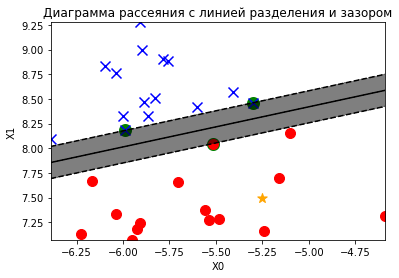

In [21]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [22]:
svm_linear.decision_function(observation_new)

array([-5.03131797])

In [23]:
svm_linear.predict(observation_new)

array([0])

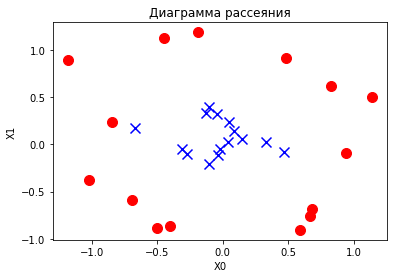

In [24]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

n_samples: Общее количество точек данных, которые будут сгенерированы.

random_state: Зерно для инициализации генератора случайных чисел, обеспечивающее воспроизводимость результатов.

factor: Фактор, определяющий, насколько сильно данные будут выглядеть как окружности. Значение factor близкое к 0 создает более сложные формы, чем чистые окружности.

noise: Управляет уровнем шума в данных. Это значение добавляется к радиусу окружностей, чтобы внести некоторую вариабельность.




In [25]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y) #Для этого набора данных воспользуемся методом опорных векторов в гауссовым ядром:

In [26]:
svm_rbf.n_support_
svm_rbf.support_
svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

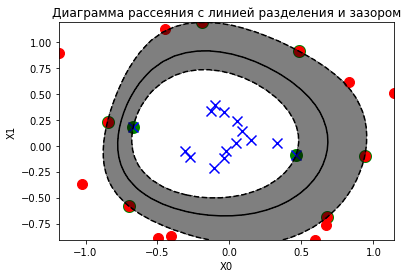

In [27]:
plot_decision_regions(X, y, svm_rbf)

In [28]:
metrics.accuracy_score(y, y_pred)

0.4666666666666667

In [29]:
metrics.confusion_matrix(y, y_pred)

array([[7, 8],
       [8, 7]], dtype=int64)

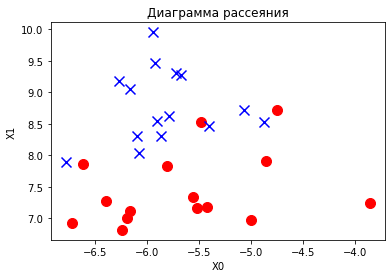

In [30]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [31]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)

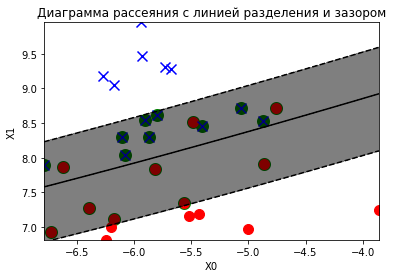

In [32]:
plot_decision_regions(X, y, svm_poly)

In [33]:
svm_poly.n_support_

array([9, 9])

In [34]:
y_pred =  svm_poly.predict(X)

In [35]:
metrics.accuracy_score(y, y_pred)

0.9

In [36]:
metrics.confusion_matrix(y, y_pred)

array([[12,  3],
       [ 0, 15]], dtype=int64)

## Задания для самостоятельного выполнения

### 1. В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.

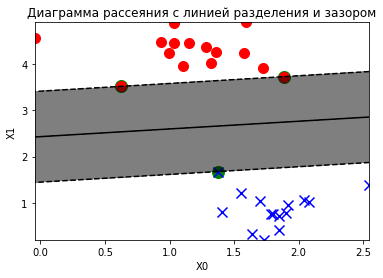

Значение C: 1, Ошибка:1.0
[[15  0]
 [ 0 15]]


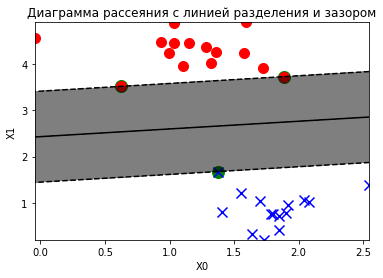

Значение C: 3, Ошибка:1.0
[[15  0]
 [ 0 15]]


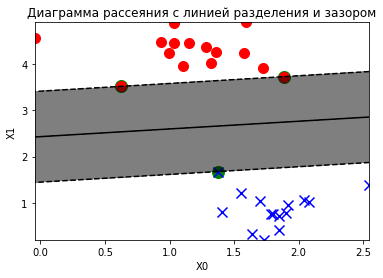

Значение C: 10, Ошибка:1.0
[[15  0]
 [ 0 15]]


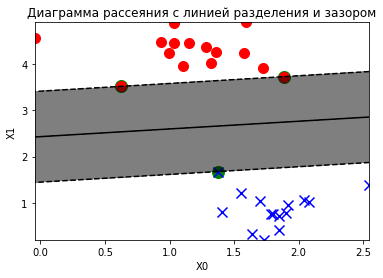

Значение C: 50, Ошибка:1.0
[[15  0]
 [ 0 15]]


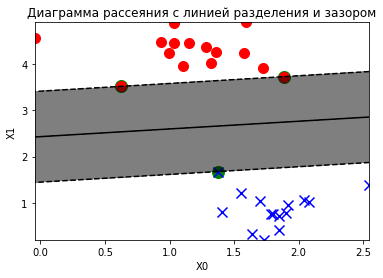

Значение C: 100, Ошибка:1.0
[[15  0]
 [ 0 15]]


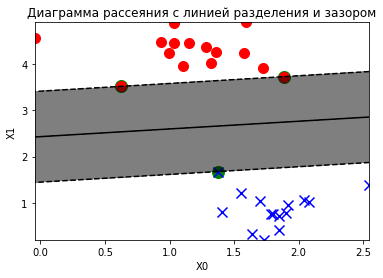

Значение C: 200, Ошибка:1.0
[[15  0]
 [ 0 15]]


In [42]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=0, cluster_std=0.4)

C_ = [1, 3, 10, 50, 100, 200]

for C in C_:
    svm_linear = SVC(kernel='linear', C=C).fit(X, y)
    plot_decision_regions(X, y, svm_linear)
    y_pred = svm_linear.predict(X)
    print(f'Значение C: {C}, Ошибка:{metrics.accuracy_score(y, y_pred)}')
    print(metrics.confusion_matrix(y, y_pred))

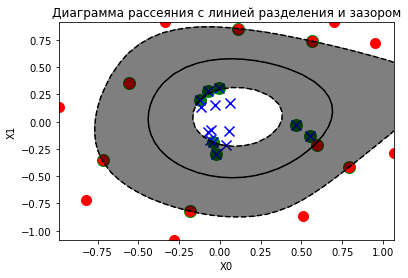

Значение C: 1, Ошибка:1.0
[[15  0]
 [ 0 15]]


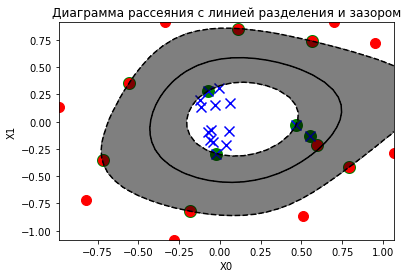

Значение C: 3, Ошибка:0.9666666666666667
[[14  1]
 [ 0 15]]


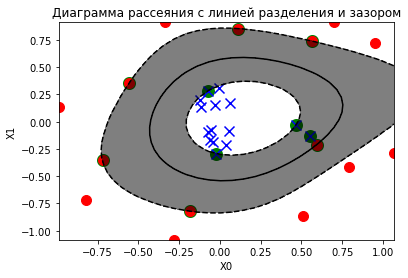

Значение C: 10, Ошибка:0.9666666666666667
[[14  1]
 [ 0 15]]


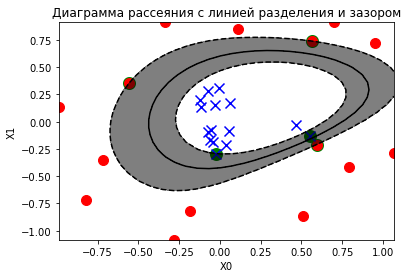

Значение C: 50, Ошибка:1.0
[[15  0]
 [ 0 15]]


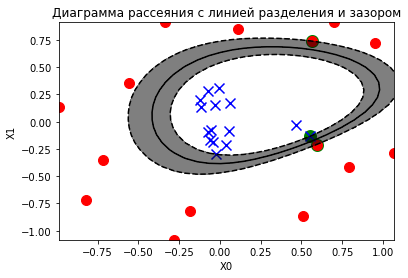

Значение C: 100, Ошибка:1.0
[[15  0]
 [ 0 15]]


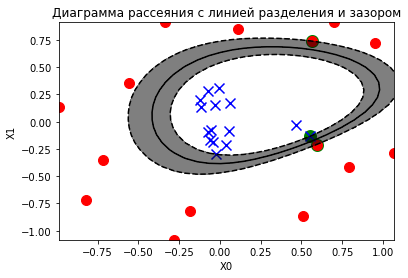

Значение C: 200, Ошибка:1.0
[[15  0]
 [ 0 15]]


In [43]:
X, y = make_circles(n_samples=30, random_state=0, factor=.1, noise=.2)

C_ = [1, 3, 10, 50, 100, 200]

for C in C_:
    svm_rbf = SVC(kernel='rbf', C=C).fit(X, y)
    plot_decision_regions(X, y, svm_rbf)
    y_pred = svm_rbf.predict(X)
    print(f'Значение C: {C}, Ошибка:{metrics.accuracy_score(y, y_pred)}')
    print(metrics.confusion_matrix(y, y_pred))


#### Вывод: Чем больше значение С в параметрах, тем более сложная решающая граница

### 2. В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?

In [44]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

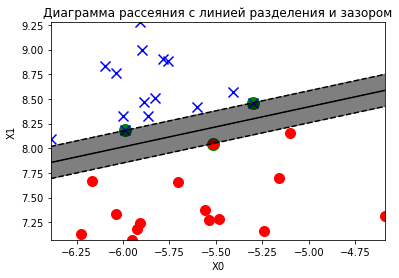

In [45]:
plot_decision_regions(X, y, svm_linear)

In [46]:
observation_new = [[-5.25, 9]]

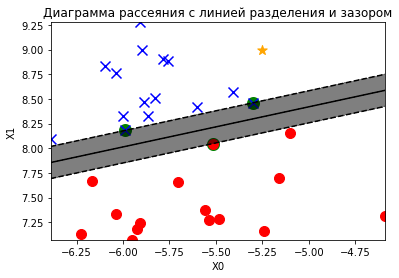

In [47]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [48]:
svm_linear.decision_function(observation_new)

array([4.18892987])

In [49]:
svm_linear.predict(observation_new)

array([1])

In [50]:
observation1 = [[-5.25, 8.35]]

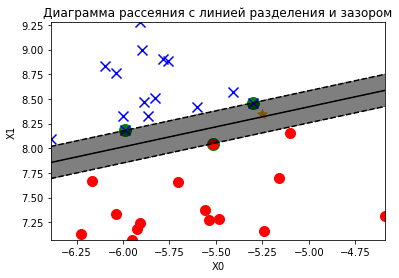

In [51]:
plt.scatter(observation1[0][0], observation1[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [52]:
svm_linear.decision_function(observation1)

array([0.19348914])

In [53]:
svm_linear.predict(observation_new)

array([1])

##### Если попадает в зазор, то decision_function находится от -1 до 1 не включительно

### 3. Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.

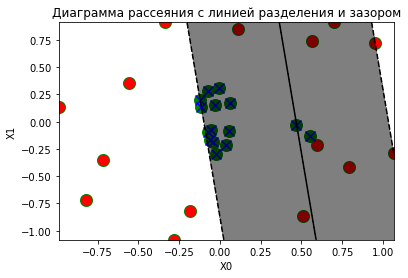

Kernel: linear, Ошибка:0.6666666666666666
[[ 6  9]
 [ 1 14]]


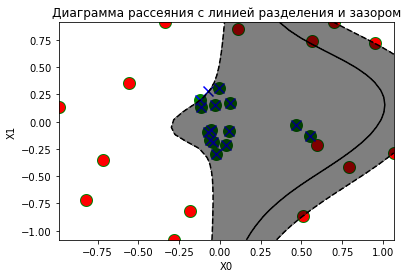

Kernel: poly, Ошибка:0.7
[[ 6  9]
 [ 0 15]]


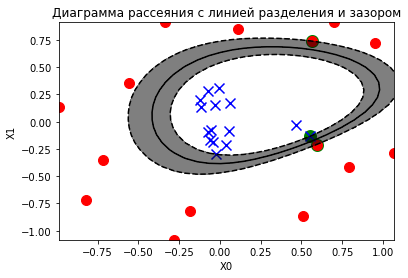

Kernel: rbf, Ошибка:1.0
[[15  0]
 [ 0 15]]


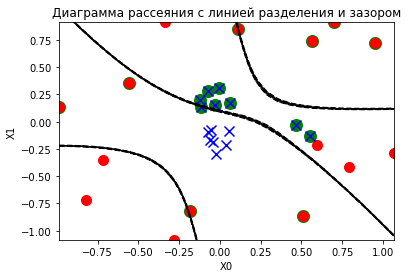

Kernel: sigmoid, Ошибка:0.5333333333333333
[[8 7]
 [7 8]]


In [54]:
X, y = make_circles(n_samples=30, random_state=0, factor=.1, noise=.2)

kernels = ['linear', 'poly', 'rbf', 'sigmoid'] #'precomputed'

for kernel in kernels:
    svm_rbf = SVC(kernel=kernel, C=100).fit(X, y)
    plot_decision_regions(X, y, svm_rbf)
    y_pred = svm_rbf.predict(X)
    print(f'Kernel: {kernel}, Ошибка:{metrics.accuracy_score(y, y_pred)}')
    print(metrics.confusion_matrix(y, y_pred))

### 4. В третьем задании поэкспериментируйте со значением аргумента C. Сделайтевывод о том, как он влияет на модель.

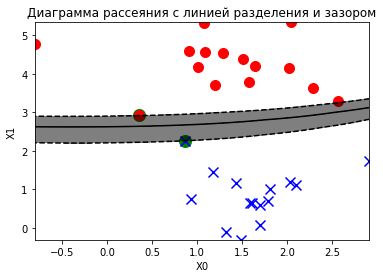

Значение C: 1, Ошибка:1.0
[[15  0]
 [ 0 15]]


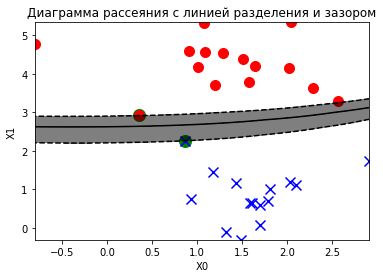

Значение C: 3, Ошибка:1.0
[[15  0]
 [ 0 15]]


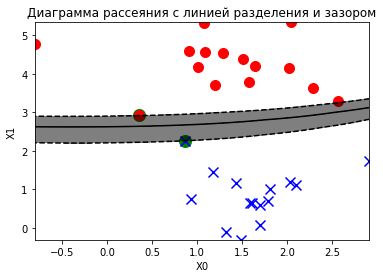

Значение C: 5, Ошибка:1.0
[[15  0]
 [ 0 15]]


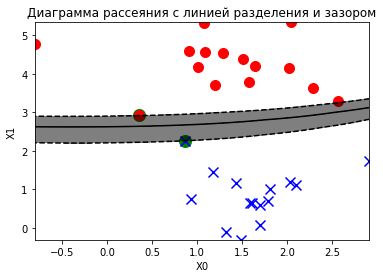

Значение C: 10, Ошибка:1.0
[[15  0]
 [ 0 15]]


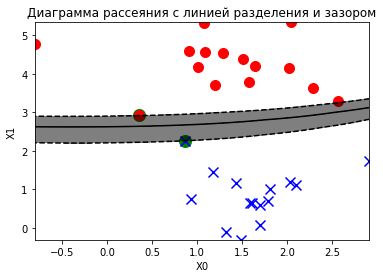

Значение C: 50, Ошибка:1.0
[[15  0]
 [ 0 15]]


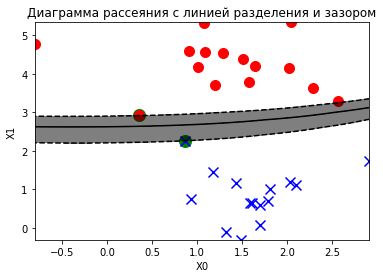

Значение C: 100, Ошибка:1.0
[[15  0]
 [ 0 15]]


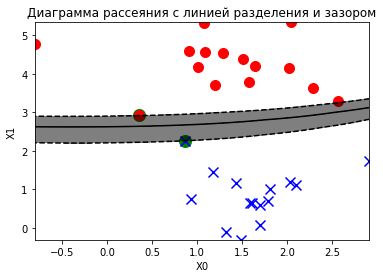

Значение C: 200, Ошибка:1.0
[[15  0]
 [ 0 15]]


In [61]:
X, y = make_blobs(n_features=2, n_samples=30,
                  centers=2, random_state=0, cluster_std=0.7)

C_values = [1, 3, 5, 10, 50, 100, 200]

for C in C_values:
    svm_poly = SVC(kernel='poly', degree=4, C=C).fit(X, y)
    plot_decision_regions(X, y, svm_poly)
    y_pred = svm_poly.predict(X)
    print(f'Значение C: {C}, Ошибка:{metrics.accuracy_score(y, y_pred)}')
    print(metrics.confusion_matrix(y, y_pred))

### 5. В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.

In [75]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=0, cluster_std=0.7)

In [76]:
svm_poly = SVC(degree=4, C=2).fit(X, y)

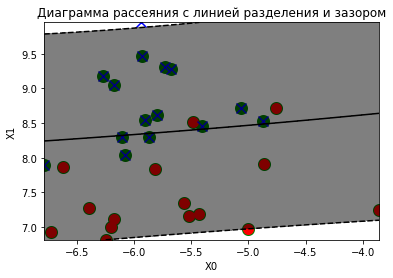

In [77]:
plot_decision_regions(X, y, svm_poly)

In [78]:
y_pred = svm_poly.predict(X)

In [79]:
accuracy = metrics.accuracy_score(y, y_pred)

In [80]:
print(accuracy)

0.8


In [81]:
metrics.confusion_matrix(y, y_pred)

array([[13,  2],
       [ 4, 11]], dtype=int64)

In [82]:
linear_svc = LinearSVC(C=100).fit(X, y)

C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [83]:
y_pred = linear_svc.predict(X)

In [84]:
accuracy = metrics.accuracy_score(y, y_pred)

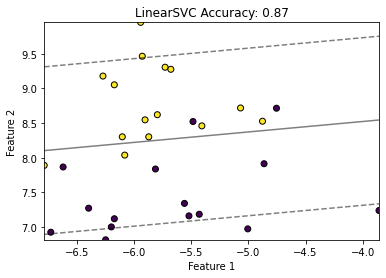

In [85]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o')
plt.title(f'LinearSVC Accuracy: {accuracy:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 50),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 50))
Z = linear_svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.show()

In [86]:
metrics.confusion_matrix(y, y_pred)

array([[13,  2],
       [ 2, 13]], dtype=int64)

### 6. Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.

In [88]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC

In [89]:
X, y = make_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svm = SVC()

grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

accuracy = grid_search.score(X_test, y_test)
print(f'Accuracy on Test Set: {accuracy:.2f}')

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Accuracy on Test Set: 0.94


### 7. Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?

In [90]:
import time

training_times = []
step_size = 10000
max_samples = 100000

for n_samples in range(step_size, max_samples + step_size, step_size):
    X, y = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, random_state=0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    svm = SVC(kernel='linear', C=1)

    start_time = time.time()
    svm.fit(X_train, y_train)
    end_time = time.time()

    training_time = end_time - start_time
    training_times.append(training_time)

    print(f"Number of Samples: {n_samples}, Training Time: {training_time:.4f} seconds")

Number of Samples: 10000, Training Time: 0.9109 seconds
Number of Samples: 20000, Training Time: 3.9194 seconds
Number of Samples: 30000, Training Time: 8.4597 seconds
Number of Samples: 40000, Training Time: 14.9597 seconds
Number of Samples: 50000, Training Time: 11.7402 seconds
Number of Samples: 60000, Training Time: 28.9935 seconds
Number of Samples: 70000, Training Time: 27.0467 seconds
Number of Samples: 80000, Training Time: 46.6087 seconds
Number of Samples: 90000, Training Time: 40.5066 seconds
Number of Samples: 100000, Training Time: 75.0872 seconds


### 8. Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.

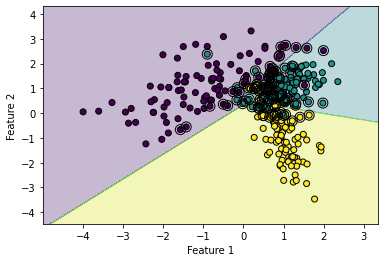

In [91]:
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=3, random_state=0)

svm = SVC(kernel='linear', C=1)
svm.fit(X, y)

def plot_decision_boundary(model, X, y):
    h = .02  # Шаг сетки
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plot_decision_boundary(svm, X, y)
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.show()

### 9. Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.

In [92]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

svm_ = SVC(kernel='linear', C=1)
svm_.fit(X, y)

y_pred = svm_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


### 10. Повторите такой же анализ для задачи регрессии и соответствующего датасета.

In [94]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr = SVR(kernel='linear', C=1)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.09
R^2 Score: 0.64
